In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nota: En este dataset el precio está en unidades de 100,000 
# random_state=0 o 42 es la "semilla" recoemndada para reproducibilidad 

# DataSet
from sklearn.datasets import fetch_california_housing

# 1. Cargar el dataset
housing = fetch_california_housing()

# 2. Convertirlo a DataFrame de pandas
df = pd.DataFrame(housing.data, columns=housing.feature_names)


# Nuestro Target es el precio de las casas
df['Price'] = housing.target 

# Pruebas
print(df.head())
print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

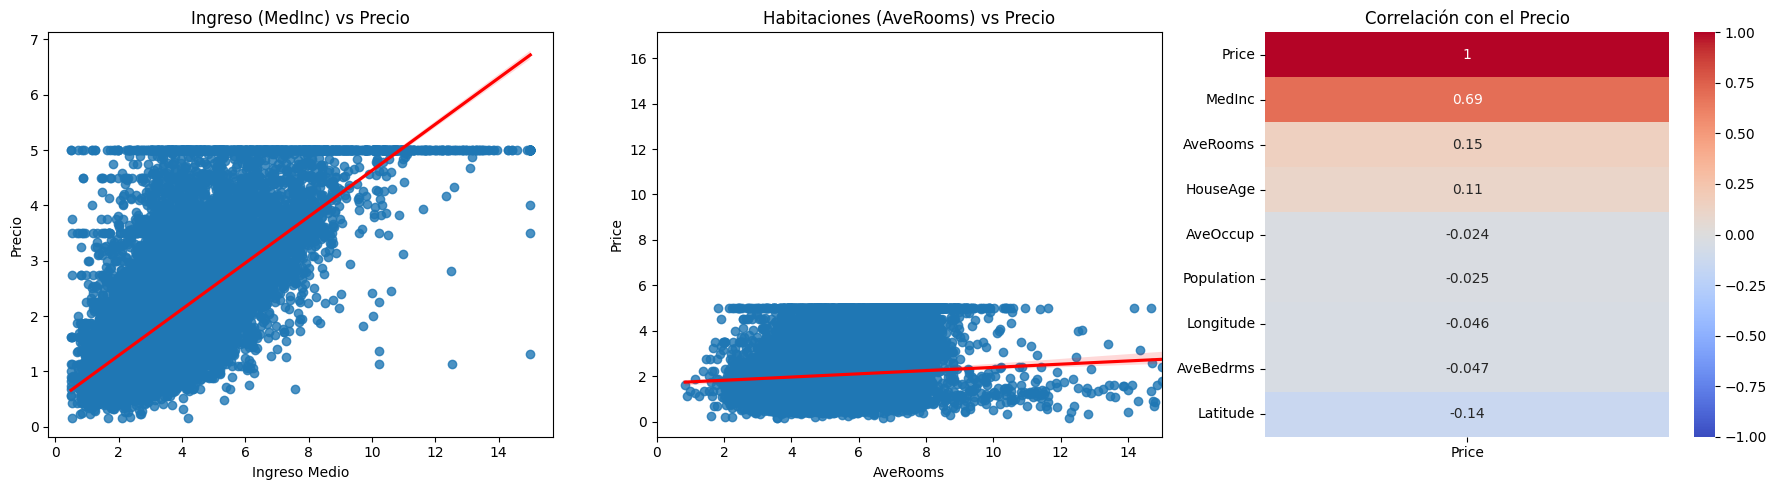

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))


# 1. Gráfico de Regresión: Ingreso Ponderado vs Precio
# Este debería mostrar una línea ascendente clara 
plt.subplot(1, 3, 1)
sns.regplot(x="MedInc", y="Price", data=df, line_kws={"color": "red"})
plt.title("Ingreso (MedInc) vs Precio")
plt.xlabel("Ingreso Medio")
plt.ylabel("Precio")

# 2. Gráfico de Regresión: Habitaciones vs Precio
# Aquí limitamos el eje X a 15 para ver mejor la mayoría de datos,
# ignoramos los datos que son basura para el modelo.
plt.subplot(1, 3, 2)
sns.regplot(x="AveRooms", y="Price", data=df, line_kws={"color": "red"})
plt.xlim(0, 15) 
plt.xticks(range(0, 16, 2))  # Mostrar ticks de 2 en 2
plt.title("Habitaciones (AveRooms) vs Precio")

# 3. Correlación Numérica
# Esto nos dirá qué variables "pesan" más matemáticamente.
plt.subplot(1, 3, 3)
correlation = df.corr()[['Price']].sort_values(by='Price', ascending=False)
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación con el Precio")

plt.tight_layout()
plt.show()

Máximo de habitaciones: 141.9090909090909
Mínimo de habitaciones: 0.8461538461538461
Promedio: 5.428999742190376 

Barrios extraños antes: 226
Barrios extraños después: 0


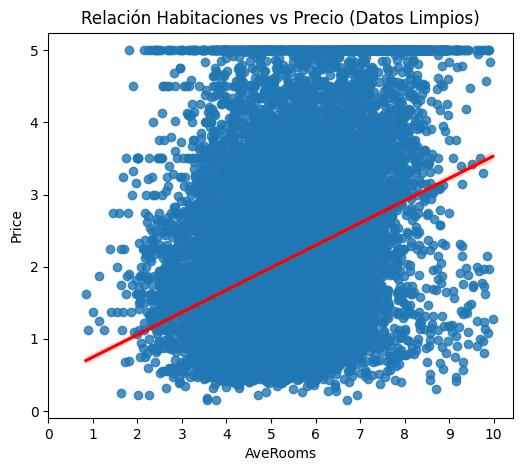

In [ ]:
# Estadísticas básicas de AveRooms
print("Máximo de habitaciones:", df['AveRooms'].max())
print("Mínimo de habitaciones:", df['AveRooms'].min())
print("Promedio:", df['AveRooms'].mean(), "\n")

# Vamos a ver cuántos barrios tienen un promedio de habitaciones "basura" (mayor a 10)
print("Barrios basura antes:", len(df[df['AveRooms'] > 10]))

# Filtro para tener mas ajustado el modelo
df_clean = df[df['AveRooms'] < 10]

# Verificar
print("Barrios basura después:", len(df_clean[df_clean['AveRooms'] > 10]))

# Gráfica de nuevo AveRooms vs Precio con la data limpia
plt.figure(figsize=(6, 5))
sns.regplot(x="AveRooms", y="Price", data=df_clean, line_kws={"color": "red"})
plt.xticks(range(0, 11, 1))  # Mostrar ticks de 1 en 1
plt.title("Relación Habitaciones vs Precio (Datos Limpios)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Definimos nuestras variables
# X = Todas las columnas menos el precio (son las características que usará para predecir)
X = df_clean.drop('Price', axis=1)

# y = Solo el precio (lo que queremos predecir)
y = df_clean['Price']

# 2. Hacemos la división (30% para test, 70% para train)
# random_state=0 es la "semilla" recoemndada para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Verificar
print("Datos totales:", df_clean.shape)
print("Datos de Entrenamiento (X_train):", X_train.shape)
print("Datos de Prueba (X_test):", X_test.shape)

Datos totales: (20413, 9)
Datos de Entrenamiento (X_train): (14289, 8)
Datos de Prueba (X_test): (6124, 8)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Crear el modelo base
lm = LinearRegression()

# 2. Entrenar el modelo 
# Le damos las respuestas correctas (y_train) para que aprenda la relación
lm.fit(X_train, y_train)

# 3. Predicciones 
# Ahora le escondemos las respuestas reales (y_test) y le pedimos que adivine
y_pred = lm.predict(X_test)

# 4. Evaluar los resultados
# Comparamos lo que predijo (y_pred) contra la realidad (y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del Modelo Lineal Simple:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Resultados del Modelo Lineal Simple:
Mean Squared Error (MSE): 0.4937
R-squared (R^2): 0.6302


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 1. Crear el Pipeline 
# Primero escala los datos, luego aplica Ridge.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2. Definir los valores de Alfa a probar el Ridge
parametros = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]
}

# 3. Configurar GridSearch
# cv=5: Dividirá los datos en 5 partes para validar (Cross Validation)
grid = GridSearchCV(pipeline, parametros, cv=5, scoring='r2')

# 4. Entrenar el Grid Search
# Probará todas las combinaciones automáticamente.
grid.fit(X_train, y_train)

# 5.  Resultados
print("Mejor valor de Alfa encontrado:", grid.best_params_)
print("Mejor R^2 durante la validación (Cross-Val):", grid.best_score_)

# 6. Prueba Final: Usamos el modelo "ganador" en el Test Set
y_pred_ridge = grid.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("-" * 30)
print(f"R^2 Final en Test Set (Ridge Optimizado): {r2_ridge:.4f}")
print(f"R^2 Anterior (Lineal Simple): 0.6302")

Mejor valor de Alfa encontrado: {'ridge__alpha': 1}
Mejor R^2 durante la validación (Cross-Val): 0.6103616452134347
------------------------------
R^2 Final en Test Set (Ridge Optimizado): 0.6302
R^2 Anterior (Lineal Simple): 0.6302


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Creamos un Pipeline más potente
# Pasos:
#   1. StandardScaler: Pone todos los números en la misma escala (vital para polinomios).
#   2. PolynomialFeatures(degree=3): Crea las curvas y combinaciones (elevando al cuadrado).
#   3. Ridge: Usamos Ridge para mantener el control.

poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', Ridge(alpha=200)) # Aca se hizo unos cambios para buscar lo mas acertativo
])

# 2. Entrenamos el modelo polinómico
print("Entrenando modelo polinómico (esto puede tardar unos segundos)...")
poly_pipeline.fit(X_train, y_train)

# 3. Predecimos y Evaluamos
y_pred_poly = poly_pipeline.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\n--- RESULTADOS MODELO POLINÓMICO (Grado 3) ---")
print(f"R-squared (R^2): {r2_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print("-" * 30)
print(f"Mejora respecto al Lineal (0.6302): +{r2_poly - 0.6302:.4f}")

Entrenando modelo polinómico (esto puede tardar unos segundos)...

--- RESULTADOS MODELO POLINÓMICO (Grado 3) ---
R-squared (R^2): 0.7090
MSE: 0.3886
------------------------------
Mejora respecto al Lineal (0.6302): +0.0788


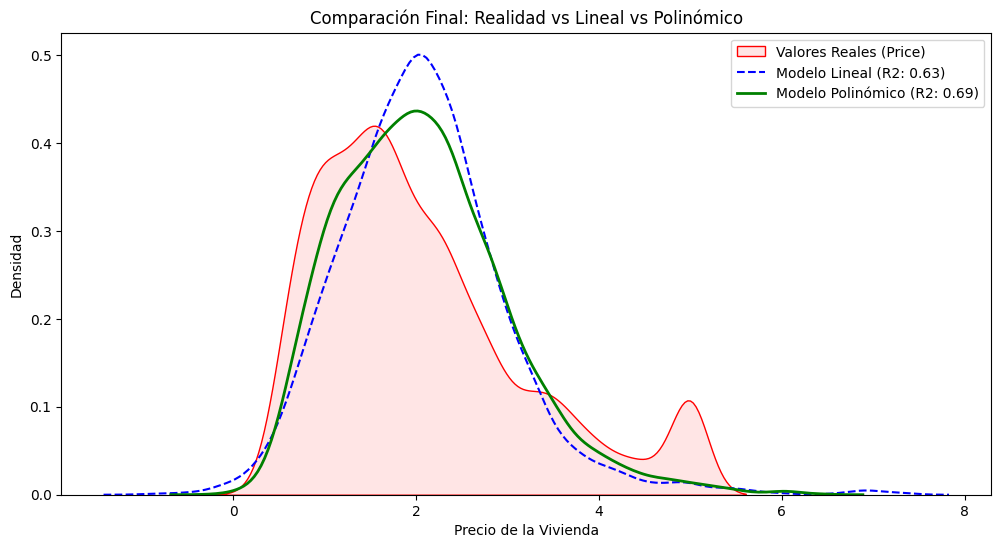

In [ ]:
# 1. Recuperamos las predicciones del modelo lineal simple (para comparar)
y_pred_lineal = lm.predict(X_test)

# 2. Configurar el gráfico
plt.figure(figsize=(12, 6))

# A. Datos Reales (Rojo)
sns.kdeplot(y_test, color="red", label="Valores Reales (Price)", fill=True, alpha=0.1)

# B. Modelo Lineal Simple (Azul Punteado)
sns.kdeplot(y_pred_lineal, color="blue", label="Modelo Lineal (R2: 0.63)", linestyle="--")

# C. Modelo Polinómico Ridge (Verde Fuerte)
# Usamos tu pipeline ganador (poly_pipeline) con alpha=100
# Asegúrate de haberlo entrenado con alpha=100 antes de correr esto
poly_pipeline.set_params(ridge__alpha=100) # Forzamos el alpha ganador
poly_pipeline.fit(X_train, y_train)
y_pred_poly_final = poly_pipeline.predict(X_test)

sns.kdeplot(y_pred_poly_final, color="green", label="Modelo Polinómico (R2: 0.69)", linewidth=2)

plt.title("Comparación Final: Realidad vs Lineal vs Polinómico")
plt.xlabel("Precio de la Vivienda")
plt.ylabel("Densidad")
plt.legend()
plt.show()

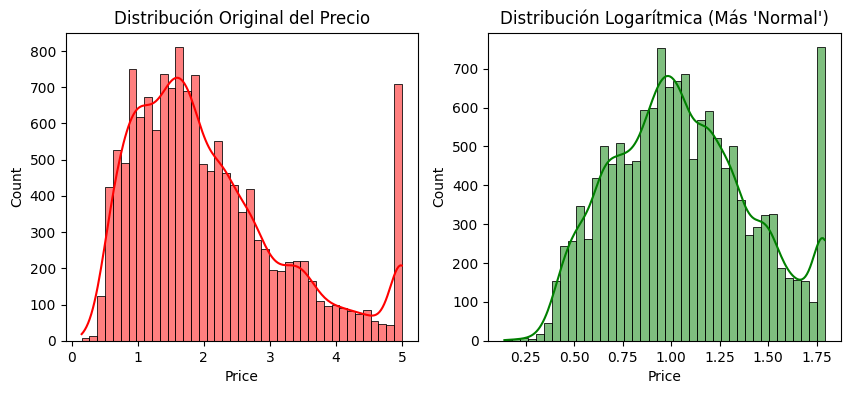

Entrenando modelo con objetivo logarítmico...
------------------------------
--- RESULTADO FINAL ---
R^2 Score: -52288076559679536.0000
MSE: 69814988468097648.0000
Comparación vs Polinomio normal (0.69): -52288076559679536.0000


In [ ]:
# 1. Visualizar el problema original
# Verás que la gráfica tiene una "cola" hacia la derecha.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, color="red")
plt.title("Distribución Original del Precio")

# 2. Aplicar Transformación Logarítmica (np.log1p)
# Usamos log1p (logaritmo de 1+x) porque es más seguro si hay ceros.
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Visualizar la mejora
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True, color="green")
plt.title("Distribución Logarítmica (Más 'Normal')")
plt.show()

# 3. Entrenar el modelo con los datos transformados
# Usamos el mismo pipeline polinómico que ya te funcionó bien
print("Entrenando modelo con objetivo logarítmico...")
poly_pipeline.fit(X_train, y_train_log)

# 4. Predecir y devolver al mundo real
# El modelo predice en logaritmos, así que usamos la inversa (expm1) para volver a dólares
y_pred_log = poly_pipeline.predict(X_test)
y_pred_final = np.expm1(y_pred_log) 

# 5. Resultado Final
r2_log = r2_score(y_test, y_pred_final)
mse_log = mean_squared_error(y_test, y_pred_final)

print("-" * 30)
print("--- RESULTADO FINAL ---")
print(f"R^2 Score: {r2_log:.4f}")
print(f"MSE: {mse_log:.4f}")
print(f"Comparación vs Polinomio normal (0.69): {r2_log - 0.6941:+.4f}")